## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = '/Users/davidey/08-2023_airbnb Berlin'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'airbnb_6.3_done.pkl'))

### 2. Data cleaning

In [5]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'km_distance_from_center', 'property_type', 'room_type',
       'accommodates', 'total_bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'city', 'is_host_local'],
      dtype='object')

Some of these columns are now unnecessary. Will drop them

In [6]:
#The group one is the one actually needed
df = df.drop(columns = ['neighbourhood_cleansed'])

In [7]:
#unnecessary location info
df = df.drop(columns = ['city'])

In [8]:
df.head(20)

,last_scraped,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,km_distance_from_center,property_type,room_type,accommodates,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_host_local
0,2023-06-23,False,1.0,Pankow,52.53471,13.41810,1.861024,Entire rental unit,Entire home/apt,4,...,83.0,4.630000,4.670000,4.52000,4.640000,4.690000,4.920000,4.620000,True,False
1,2023-06-23,False,1.0,Pankow,52.53269,13.41805,1.665384,Entire rental unit,Entire home/apt,7,...,180.0,5.000000,5.000000,5.00000,5.000000,5.000000,4.860000,4.860000,True,True
2,2023-06-23,False,4.0,Pankow,52.54813,13.40366,3.128248,Entire rental unit,Entire home/apt,1,...,70.0,4.670000,5.000000,4.84000,4.680000,4.840000,4.580000,4.420000,False,True
3,2023-06-23,False,4.0,Friedrichshain-Kreuzberg,52.50312,13.43508,2.771781,Entire condo,Entire home/apt,5,...,92.0,4.720000,4.860000,4.86000,4.930000,4.860000,4.670000,4.710000,False,False
4,2023-06-23,True,2.0,Neukölln,52.49419,13.42166,3.085462,Entire rental unit,Entire home/apt,2,...,25.0,4.770000,4.820000,4.71000,4.890000,4.920000,4.870000,4.650000,False,False
5,2023-06-23,False,4.0,Pankow,52.53711,13.40888,1.920112,Entire loft,Entire home/apt,4,...,179.0,4.490000,4.610000,4.62000,4.480000,4.490000,4.890000,4.370000,True,False
6,2023-06-23,False,4.0,Friedrichshain-Kreuzberg,52.50460,13.43374,2.594248,Entire rental unit,Entire home/apt,2,...,70.0,4.740000,4.700000,4.91000,4.770000,4.580000,4.620000,4.580000,False,False
7,2023-06-23,False,2.0,Mitte,52.53408,13.38871,1.912060,Entire rental unit,Entire home/apt,2,...,53.0,4.700000,4.760000,4.70000,4.820000,4.730000,4.620000,4.680000,False,True
8,2023-06-23,True,1.0,Mitte,52.53355,13.40476,1.505859,Entire rental unit,Entire home/apt,6,...,170.0,4.800000,4.820000,4.76000,4.880000,4.890000,4.940000,4.680000,True,True
9,2023-06-23,False,1.0,Friedrichshain-Kreuzberg,52.49134,13.37975,3.615473,Entire condo,Entire home/apt,4,...,65.0,4.370000,4.410000,4.51000,4.720000,4.590000,4.520000,4.390000,False,True


In [9]:
df.shape

(56793, 23)

##### Missing values

In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

last_scraped                    0
host_is_superhost               0
host_listings_count             0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
km_distance_from_center         0
property_type                   0
room_type                       0
accommodates                    0
total_bathrooms                 0
bedrooms                        0
beds                            0
price                           0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
license                         0
is_host_local                   0
dtype: int64

##### Duplicates check

In [11]:
dups = df.duplicated()

In [12]:
dups.shape # No dups

(56793,)

##### Extreme values checks

/var/folders/mr/08vwt9d53xlckqzs27_s_rz40000gn/T/ipykernel_19619/1302738382.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=25) # Shows extreme values


<Axes: xlabel='price', ylabel='Density'>

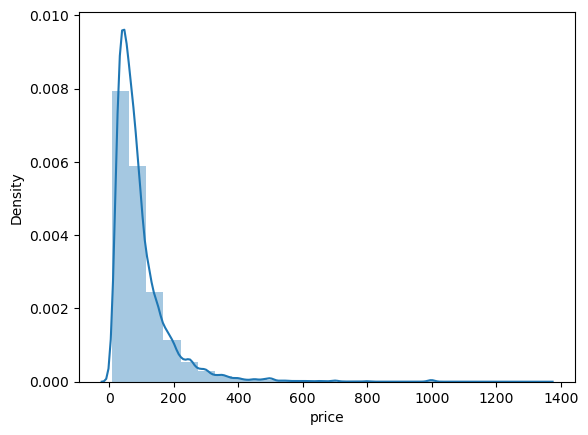

In [13]:
sns.distplot(df['price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [14]:
df['price'].mean() # Check the mean

97.18712851935977

In [15]:
df['price'].median() # Check the median

70.0

In [16]:
df['price'].max() # Check the max

1343.0

# Hypothesis

Given the correlation charts made earlier, I don't think there are any values that will make for good prediction models. The correlations were generally very weak. Even specific rating aspects on overall rating were weak.

### 3. Data prep for regression analysis 

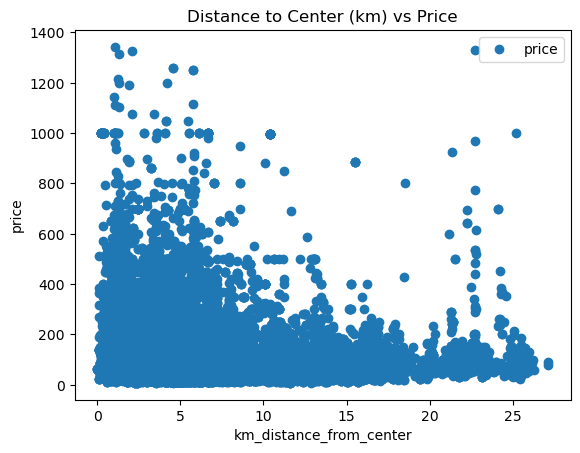

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'km_distance_from_center', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to Center (km) vs Price')  
plt.xlabel('km_distance_from_center')  
plt.ylabel('price')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['km_distance_from_center'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [19]:
X

array([[ 1.86102426],
       [ 1.66538356],
       [ 3.12824838],
       ...,
       [22.7158864 ],
       [20.98659455],
       [24.84295399]])

In [20]:
y

array([[ 83.],
       [180.],
       [ 70.],
       ...,
       [195.],
       [ 60.],
       [ 60.]])

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

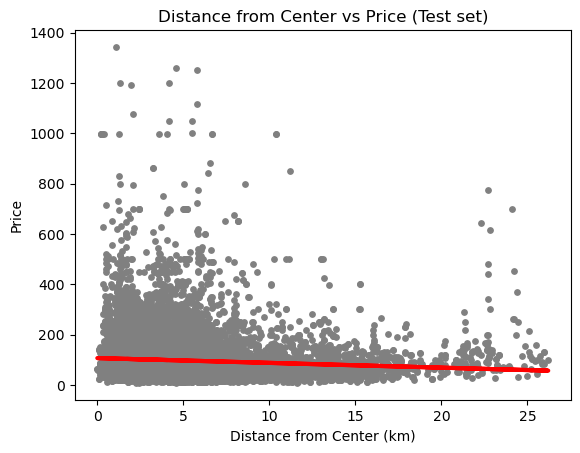

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from Center vs Price (Test set)')
plot_test.xlabel('Distance from Center (km)')
plot_test.ylabel('Price')
plot_test.show()

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.90191922]]
Mean squared error:  8348.066290415061
R2 score:  0.006363663624362026


With such low R2 scores, this is actually quite a bad predictor

In [28]:
y_predicted

array([[ 99.11718945],
       [101.60655613],
       [ 98.91983038],
       ...,
       [102.48797462],
       [ 94.98671287],
       [103.20808089]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,80.0,99.117189
1,25.0,101.606556
2,100.0,98.919830
3,132.0,103.580873
4,256.0,105.847266
5,143.0,100.757878
6,75.0,100.072398
7,95.0,92.281544
8,92.0,96.463989
9,25.0,94.465548


##### Compare how the regression fits the training set

In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.90191922]]
Mean squared error:  8638.065599062818
R2 score:  0.005006378563132463


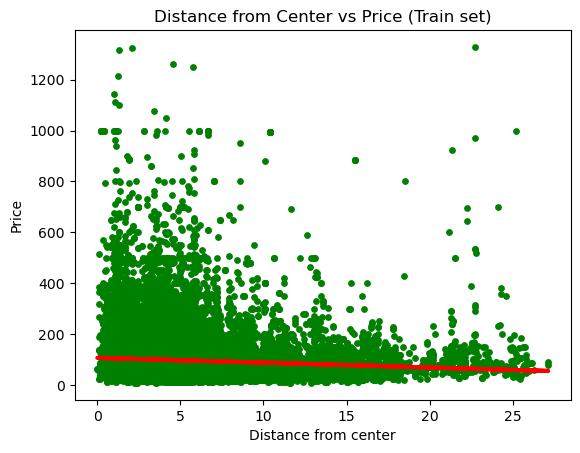

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from Center vs Price (Train set)')
plot_test.xlabel('Distance from center')
plot_test.ylabel('Price')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [34]:
df.describe()

,host_listings_count,latitude,longitude,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000
mean,9.427201,52.509623,13.403783,4.915297,2.851179,1.122348,1.282324,1.789129,97.187129,4.658471,4.787918,4.653335,4.817289,4.817127,4.755275,4.645208
std,54.854938,0.034040,0.066875,3.463282,1.769177,0.378511,0.646286,1.386682,92.723834,0.631281,0.344434,0.433655,0.332183,0.343715,0.323233,0.388044
min,1.000000,52.332300,13.072850,0.000329,1.000000,0.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,52.489710,13.366050,2.932777,2.000000,1.000000,1.000000,1.000000,45.000000,4.658437,4.787921,4.620000,4.817192,4.817044,4.730000,4.600000
50%,1.000000,52.509720,13.413190,4.148767,2.000000,1.000000,1.000000,1.000000,70.000000,4.750000,4.830000,4.690000,4.870000,4.880000,4.780000,4.670000
75%,3.000000,52.532550,13.438850,5.831874,4.000000,1.000000,1.000000,2.000000,119.000000,4.980000,5.000000,4.940000,5.000000,5.000000,4.990000,4.860000
max,1126.000000,52.673960,13.769390,27.135185,16.000000,8.500000,12.000000,29.000000,1343.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [35]:
97.187129 + (2*92.723834)

282.634797

In [36]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['price'] <=282.63] 

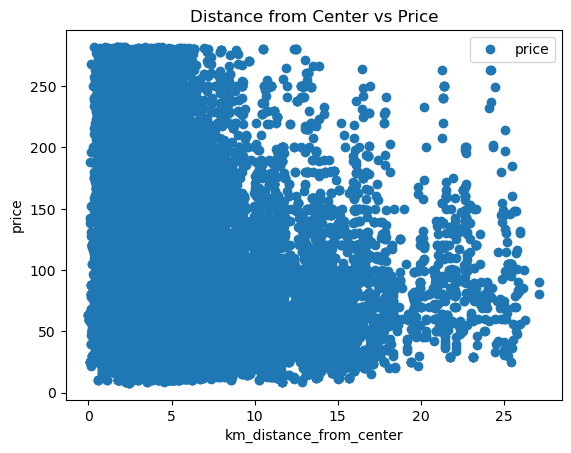

In [37]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'km_distance_from_center', y='price', style='o')  
plt.title('Distance from Center vs Price')  
plt.xlabel('km_distance_from_center')  
plt.ylabel('price')  
plt.show()

In [38]:
# Reshape again.

X_2 = df_test['km_distance_from_center'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [39]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [40]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [41]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [42]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.45465743]]
Mean squared error:  3048.4306533714266
R2 score:  0.008599639218077604


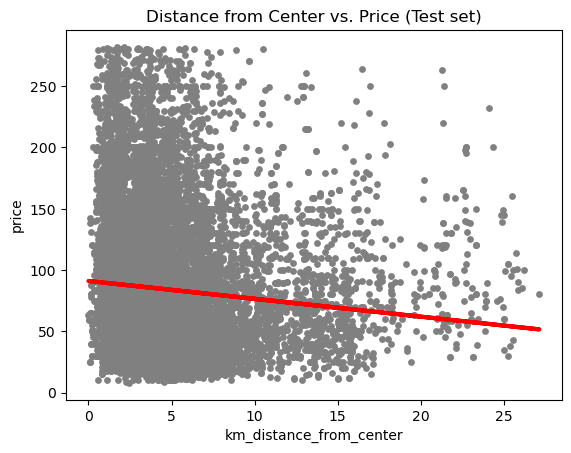

In [44]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Distance from Center vs. Price (Test set)')
plot_test.xlabel('km_distance_from_center')
plot_test.ylabel('price')
plot_test.show()

In [45]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,128.0,89.303093
1,38.0,68.293439
2,180.0,84.305050
3,62.0,87.629004
4,39.0,84.485845
5,81.0,84.885911
6,90.0,84.809496
7,250.0,88.911238
8,68.0,88.372407
9,62.0,90.172418


This improved, but is really no good. Let me try something else.

### Data prep for regression analysis- distance and rating

In [46]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'km_distance_from_center', 'property_type', 'room_type', 'accommodates',
       'total_bathrooms', 'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'is_host_local'],
      dtype='object')

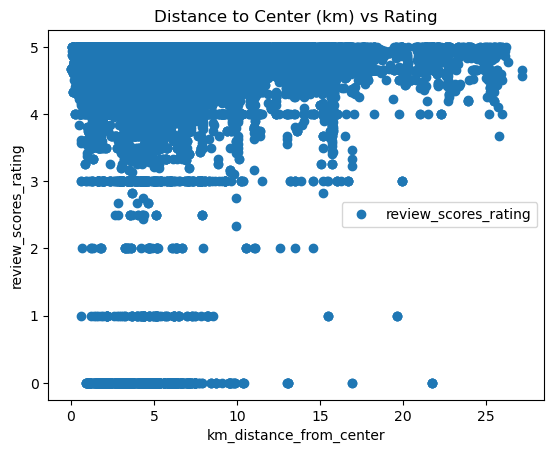

In [47]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'km_distance_from_center', y='review_scores_rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to Center (km) vs Rating')  
plt.xlabel('km_distance_from_center')  
plt.ylabel('review_scores_rating')  
plt.show()

In [48]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['km_distance_from_center'].values.reshape(-1,1)
y = df['review_scores_rating'].values.reshape(-1,1)

In [49]:
X

array([[ 1.86102426],
       [ 1.66538356],
       [ 3.12824838],
       ...,
       [22.7158864 ],
       [20.98659455],
       [24.84295399]])

In [50]:
y

array([[4.63      ],
       [5.        ],
       [4.67      ],
       ...,
       [4.65843735],
       [4.65843735],
       [4.65843735]])

In [51]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis - distance and rating

In [52]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [53]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

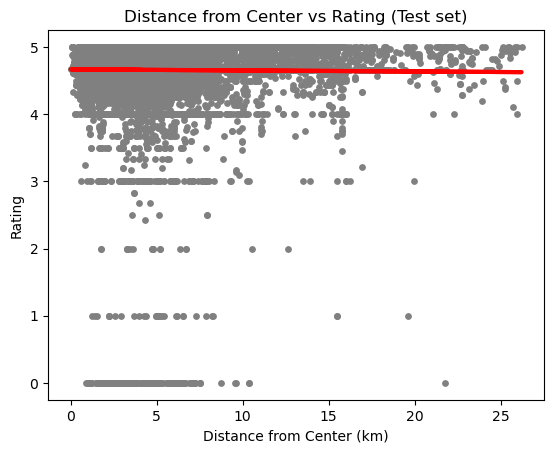

In [55]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from Center vs Rating (Test set)')
plot_test.xlabel('Distance from Center (km)')
plot_test.ylabel('Rating')
plot_test.show()

In [56]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [57]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00155835]]
Mean squared error:  0.3912659167947132
R2 score:  -0.00019183293748947783


Well, that's horrible. Even worse. I think I will try something known to be better correlated

### Data prep for regression analysis- review scores and prices

In [58]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'km_distance_from_center', 'property_type', 'room_type', 'accommodates',
       'total_bathrooms', 'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'is_host_local'],
      dtype='object')

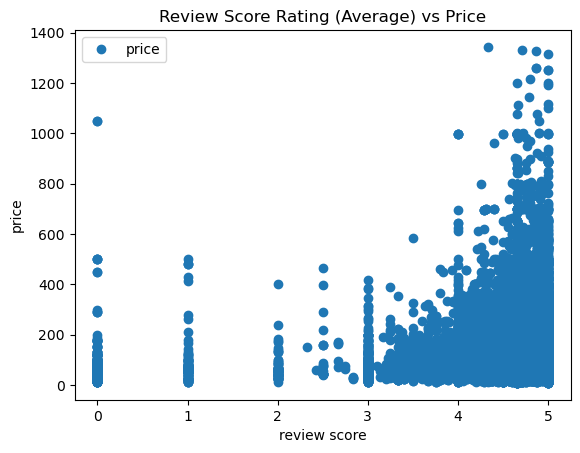

In [59]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'review_scores_rating', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Review Score Rating (Average) vs Price')  
plt.xlabel('review score')  
plt.ylabel('price')  
plt.show()

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['review_scores_rating'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [61]:
X

array([[4.63      ],
       [5.        ],
       [4.67      ],
       ...,
       [4.65843735],
       [4.65843735],
       [4.65843735]])

In [62]:
y

array([[ 83.],
       [180.],
       [ 70.],
       ...,
       [195.],
       [ 60.],
       [ 60.]])

In [63]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis - distance and rating

In [64]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [65]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

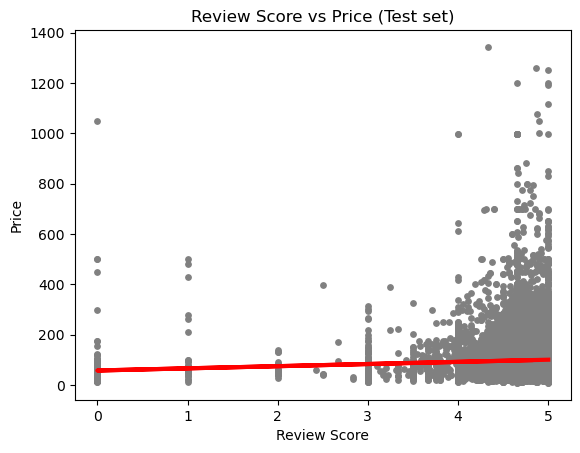

In [67]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Review Score vs Price (Test set)')
plot_test.xlabel('Review Score')
plot_test.ylabel('Price')
plot_test.show()

In [68]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.5811679]]
Mean squared error:  0.3912659167947132
R2 score:  -0.00019183293748947783


One again, a truly horrible R2 score

### Data prep for regression analysis- distance and rating

In [69]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'km_distance_from_center', 'property_type', 'room_type', 'accommodates',
       'total_bathrooms', 'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'is_host_local'],
      dtype='object')

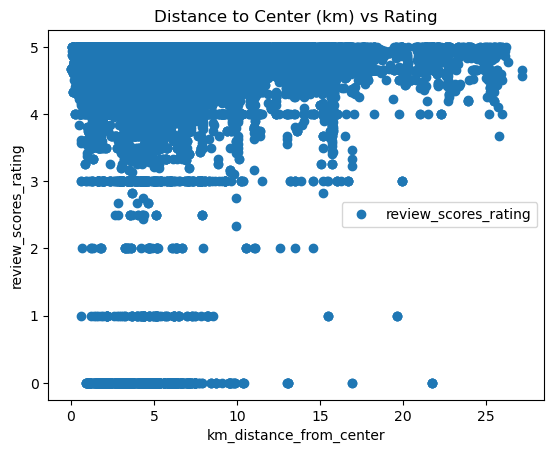

In [70]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'km_distance_from_center', y='review_scores_rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to Center (km) vs Rating')  
plt.xlabel('km_distance_from_center')  
plt.ylabel('review_scores_rating')  
plt.show()

In [71]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['km_distance_from_center'].values.reshape(-1,1)
y = df['review_scores_rating'].values.reshape(-1,1)

In [72]:
X

array([[ 1.86102426],
       [ 1.66538356],
       [ 3.12824838],
       ...,
       [22.7158864 ],
       [20.98659455],
       [24.84295399]])

In [73]:
y

array([[4.63      ],
       [5.        ],
       [4.67      ],
       ...,
       [4.65843735],
       [4.65843735],
       [4.65843735]])

In [74]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis - distance and rating

In [75]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [76]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [77]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

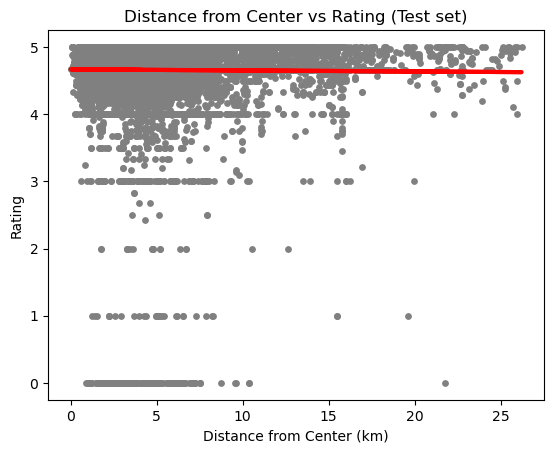

In [78]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from Center vs Rating (Test set)')
plot_test.xlabel('Distance from Center (km)')
plot_test.ylabel('Rating')
plot_test.show()

In [79]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [80]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00155835]]
Mean squared error:  0.3912659167947132
R2 score:  -0.00019183293748947783


Given what I know, I think beds is going to be the best one. Gonna run that all the way through

### Data prep for regression analysis- beds and prices

In [81]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'km_distance_from_center', 'property_type', 'room_type', 'accommodates',
       'total_bathrooms', 'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'is_host_local'],
      dtype='object')

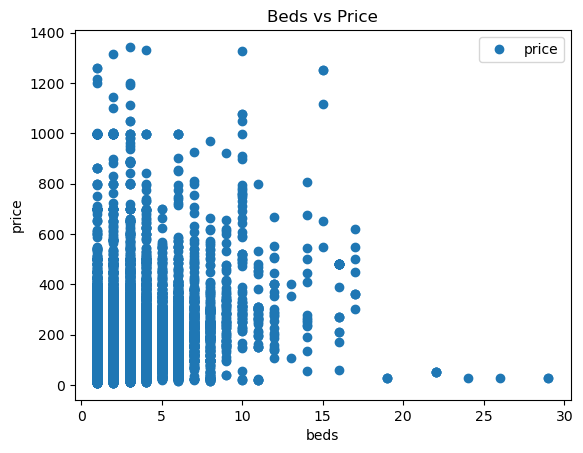

In [82]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'beds', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Beds vs Price')  
plt.xlabel('beds')  
plt.ylabel('price')  
plt.show()

In [83]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['beds'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [84]:
X

array([[2.],
       [7.],
       [1.],
       ...,
       [4.],
       [1.],
       [2.]])

In [85]:
y

array([[ 83.],
       [180.],
       [ 70.],
       ...,
       [195.],
       [ 60.],
       [ 60.]])

In [86]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [87]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

### Regression analysis - beds and price

In [88]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [89]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [90]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

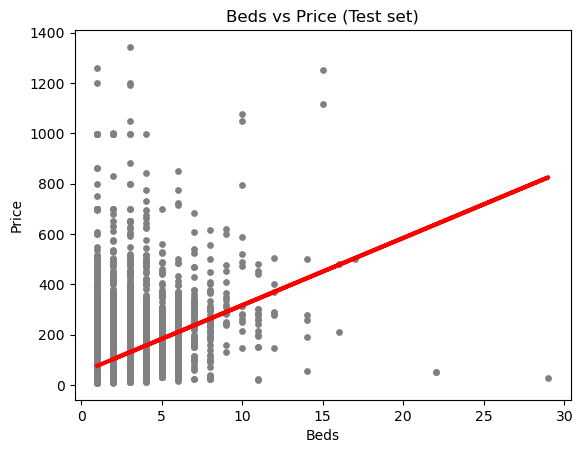

In [91]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Beds vs Price (Test set)')
plot_test.xlabel('Beds')
plot_test.ylabel('Price')
plot_test.show()

In [92]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [93]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[26.74249558]]
Mean squared error:  7102.275896990303
R2 score:  0.1546450211689001


In [94]:
y_predicted

array([[ 76.01395082],
       [102.7564464 ],
       [ 76.01395082],
       ...,
       [ 76.01395082],
       [ 76.01395082],
       [102.7564464 ]])

In [95]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,80.0,76.013951
1,25.0,102.756446
2,100.0,76.013951
3,132.0,156.241438
4,256.0,209.726429
5,143.0,102.756446
6,75.0,102.756446
7,95.0,76.013951
8,92.0,129.498942
9,25.0,76.013951


In [96]:
# Compare how the regression fits the training set

In [97]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [98]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [99]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[26.74249558]]
Mean squared error:  7274.892154722188
R2 score:  0.16202635791802522


A very slight improvement

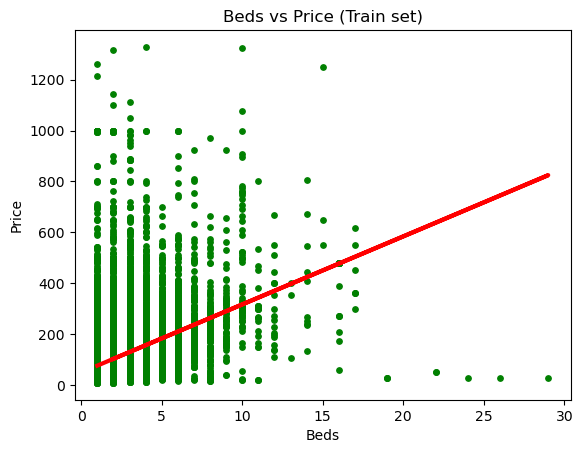

In [100]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Beds vs Price (Train set)')
plot_test.xlabel('Beds')
plot_test.ylabel('Price')
plot_test.show()

In [101]:
# Clean the extreme values from the "Price" variable observed as above.

df_test = df[df['price'] <=282.63] 

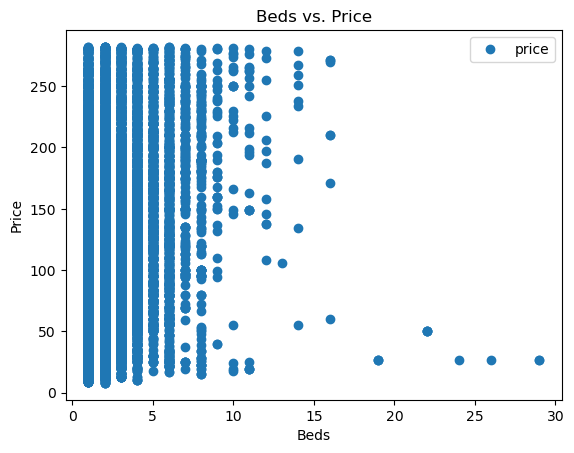

In [102]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'beds', y='price', style='o')  
plt.title('Beds vs. Price')  
plt.xlabel('Beds')  
plt.ylabel('Price')  
plt.show()

In [103]:
# Reshape again.

X_2 = df_test['beds'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [104]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [105]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [106]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [107]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [108]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[17.63349651]]
Mean squared error:  2599.53055061993
R2 score:  0.1545894203307565


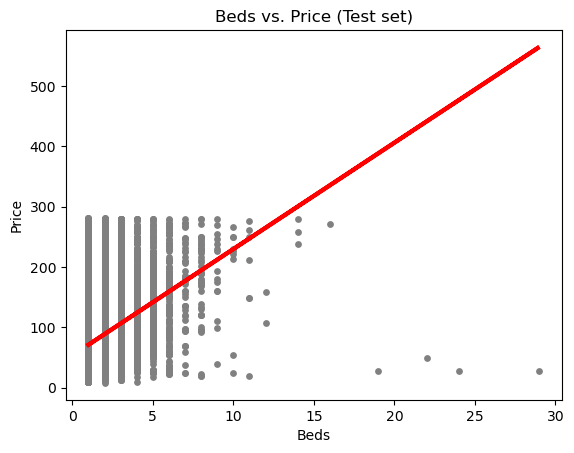

In [109]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Beds vs. Price (Test set)')
plot_test.xlabel('Beds')
plot_test.ylabel('Price')
plot_test.show()

In [110]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,128.0,71.279637
1,38.0,106.546630
2,180.0,71.279637
3,62.0,71.279637
4,39.0,88.913133
5,81.0,88.913133
6,90.0,88.913133
7,250.0,71.279637
8,68.0,71.279637
9,62.0,71.279637


All in all, these just aren't such good predictors. I did think of one though: trying review scores against each other. Value was flagged as the strongest before.

# Review Scores: Value on Overall Rating

### Data prep for regression analysis- Value on Overall Rating

In [111]:
df.columns

Index(['last_scraped', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'km_distance_from_center', 'property_type', 'room_type', 'accommodates',
       'total_bathrooms', 'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'is_host_local'],
      dtype='object')

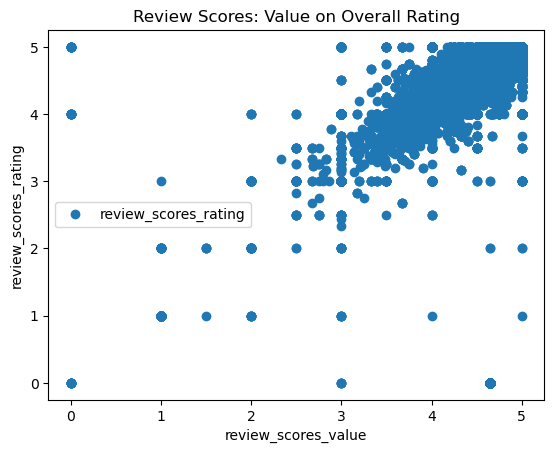

In [112]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'review_scores_value', y='review_scores_rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Review Scores: Value on Overall Rating')  
plt.xlabel('review_scores_value')  
plt.ylabel('review_scores_rating')  
plt.show()



In [113]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['review_scores_value'].values.reshape(-1,1)
y = df['review_scores_rating'].values.reshape(-1,1)

In [114]:
X

array([[4.62      ],
       [4.86      ],
       [4.42      ],
       ...,
       [4.64504334],
       [4.64504334],
       [4.64504334]])

In [115]:
y

array([[4.63      ],
       [5.        ],
       [4.67      ],
       ...,
       [4.65843735],
       [4.65843735],
       [4.65843735]])

In [116]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [117]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

### Regression analysis - value on overall rating

In [118]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [119]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [120]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

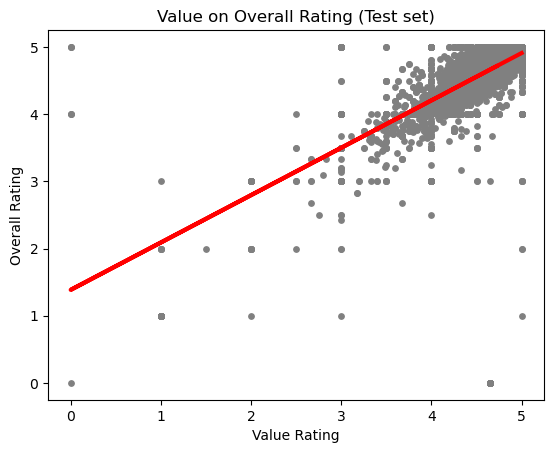

In [121]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Value on Overall Rating (Test set)')
plot_test.xlabel('Value Rating')
plot_test.ylabel('Overall Rating')
plot_test.show()



In [122]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [123]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.70485192]]
Mean squared error:  0.3166715923977261
R2 score:  0.19049340398924586


Still very weak

In [124]:
y_predicted

array([[4.90900036],
       [4.67639922],
       [4.80327257],
       ...,
       [4.90900036],
       [4.65880847],
       [4.71164182]])

In [125]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.000000,4.909000
1,4.600000,4.676399
2,4.850000,4.803273
3,4.630000,4.556574
4,4.700000,4.577720
5,4.910000,4.704593
6,4.170000,4.323973
7,5.000000,4.909000
8,4.800000,4.775078
9,4.670000,4.775078


In [126]:
# Compare how the regression fits the training set

In [127]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [128]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [129]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.70485192]]
Mean squared error:  0.3256930879809179
R2 score:  0.18910237047548262


Got worse actually, training set is not so good. :(

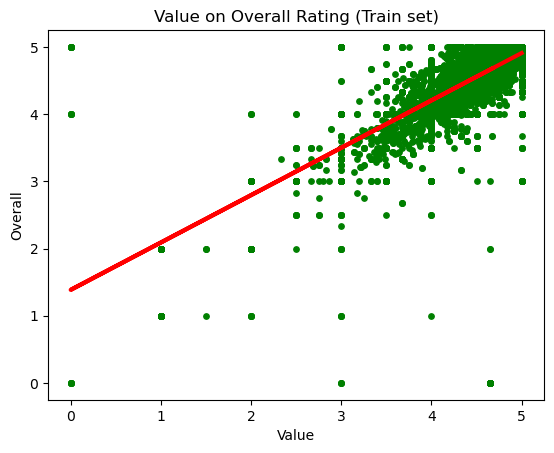

In [130]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Value on Overall Rating (Train set)')
plot_test.xlabel('Value')
plot_test.ylabel('Overall')
plot_test.show()

In [131]:
df.describe()

,host_listings_count,latitude,longitude,km_distance_from_center,accommodates,total_bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000,56793.000000
mean,9.427201,52.509623,13.403783,4.915297,2.851179,1.122348,1.282324,1.789129,97.187129,4.658471,4.787918,4.653335,4.817289,4.817127,4.755275,4.645208
std,54.854938,0.034040,0.066875,3.463282,1.769177,0.378511,0.646286,1.386682,92.723834,0.631281,0.344434,0.433655,0.332183,0.343715,0.323233,0.388044
min,1.000000,52.332300,13.072850,0.000329,1.000000,0.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,52.489710,13.366050,2.932777,2.000000,1.000000,1.000000,1.000000,45.000000,4.658437,4.787921,4.620000,4.817192,4.817044,4.730000,4.600000
50%,1.000000,52.509720,13.413190,4.148767,2.000000,1.000000,1.000000,1.000000,70.000000,4.750000,4.830000,4.690000,4.870000,4.880000,4.780000,4.670000
75%,3.000000,52.532550,13.438850,5.831874,4.000000,1.000000,1.000000,2.000000,119.000000,4.980000,5.000000,4.940000,5.000000,5.000000,4.990000,4.860000
max,1126.000000,52.673960,13.769390,27.135185,16.000000,8.500000,12.000000,29.000000,1343.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [132]:
# overall mean: 4.658471	
# overall std: 0.631281
# value mean: 4.645208
# value std: 0.388044

print("Overall outliers are under ", 4.658471 - (0.631281*2))
print("value outliers are under ", 4.645208 - (0.388044*2))

Overall outliers are under  3.3959089999999996
value outliers are under  3.86912


In [133]:
# Clean the extreme values from the "Price" variable observed as above.

df_test = df[df['review_scores_rating'] >=3.3959089999999996] 

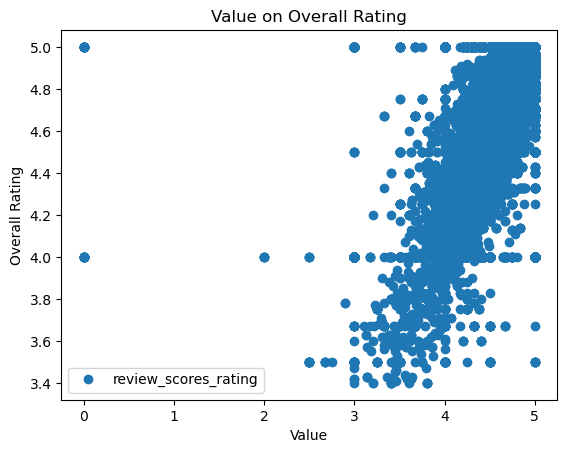

In [134]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'review_scores_value', y='review_scores_rating', style='o')  
plt.title('Value on Overall Rating')  
plt.xlabel('Value')  
plt.ylabel('Overall Rating')  
plt.show()

In [135]:
# Reshape again.

X_2 = df_test['review_scores_value'].values.reshape(-1,1)
y_2 = df_test['review_scores_rating'].values.reshape(-1,1)

In [136]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [137]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [138]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [139]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [140]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.54166415]]
Mean squared error:  0.03972292791091107
R2 score:  0.42220892816229183


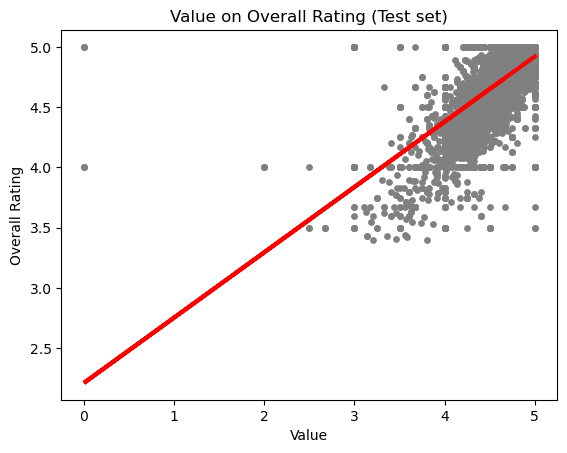

In [141]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Value on Overall Rating (Test set)')
plot_test.xlabel('Value')
plot_test.ylabel('Overall Rating')
plot_test.show()

In [142]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,5.000000,4.921644
1,4.560000,4.753728
2,4.640000,4.791645
3,4.910000,4.921644
4,4.940000,4.807895
5,4.658437,4.729377
6,4.360000,4.417897
7,4.600000,4.732062
8,5.000000,4.813311
9,4.840000,4.753728


That's probably about as high as these R2 scores will go truly.

The low R2 scores indicate that these models are not good predictors.

I believe that other factors, qualitative ones like room type, property type, and perhaps neighborhood, are in fact the most important factors for rating and price, and can't be covered here.

I would even imagine multiple factors together, like host locality and bathroom count, probably will not make good models. Qualitative info is likely the most important.

In [143]:
#export dataset
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'airbnb_6.4_done.pkl'))